# Explore States Space

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
direct = Path().absolute()
curr_path = direct.__str__().split('\\')[-1]
PATH_MODEL = '../../artifacts/'+curr_path+'/'

In [28]:
%matplotlib inline

## Get Collections

![image](../../images/1_vslpUR9-ii_T-flNmmvgXg.webp)

source : https://towardsdatascience.com/how-to-beat-the-cartpole-game-in-5-lines-5ab4e738c93f


    x=0.018: the cart is on the right side of the origin O
    v=0.669: the cart is moving to the right
    θ=0.286: the pole is at (0.286/2π*360≈16.4 degrees) clockwise from vertical
    ω=0.618: the pole is rotating close-wise

where :

    x: the horizontal position of the cart (positive means to the right)
    v: the horizontal velocity of the cart (positive means moving to the right)
    θ: the angle between the pole and the vertical position (positive means clock-wise)
    ω: angular velocity of the pole (positive means rotating clock-wise)

In [36]:
state_space = np.load(PATH_MODEL+'states_collections.npy') 

In [37]:
state_space.shape

(55852, 4)

In [38]:
df_state_space = pd.DataFrame(state_space)

<AxesSubplot:xlabel='0', ylabel='Count'>

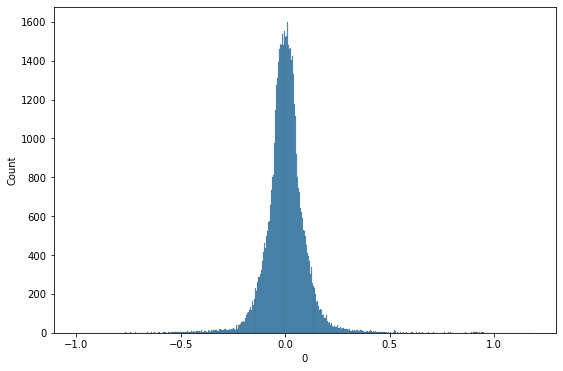

In [39]:
plt.figure(figsize = (9,6))
sns.histplot(df_state_space[0])

<AxesSubplot:xlabel='1', ylabel='Count'>

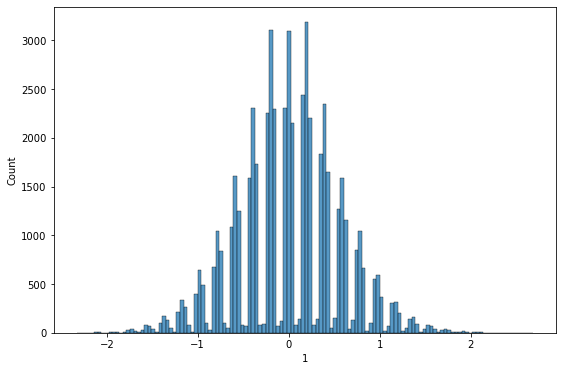

In [40]:
plt.figure(figsize = (9,6))
sns.histplot(df_state_space[1])

<AxesSubplot:xlabel='2', ylabel='Count'>

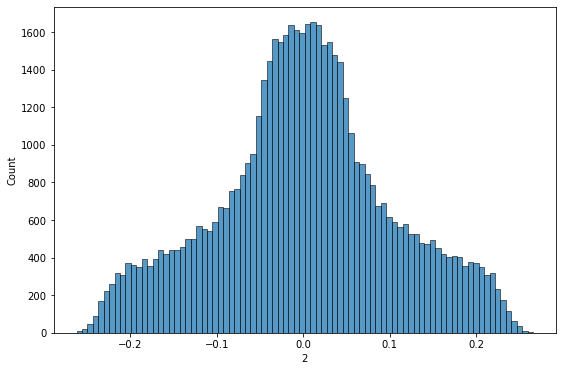

In [41]:
plt.figure(figsize = (9,6))
sns.histplot(df_state_space[2])

<AxesSubplot:xlabel='3', ylabel='Count'>

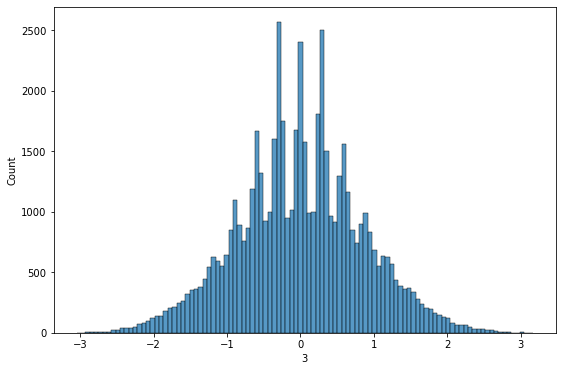

In [42]:
plt.figure(figsize = (9,6))
sns.histplot(df_state_space[3])

## Explore v0

In [138]:
Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])
addition = np.array([15,10,1,10])

In [139]:
sp_v0 = np.product(Observation)

In [65]:
space_v0 = ((state_space/np_array_win_size) + addition).astype(np.int64)
df_state_space_t = pd.DataFrame(space_v0, columns = ['T0','T1','T2','T3'])
df_compare = pd.concat([df_state_space,df_state_space_t], axis = 1)
df_compare

,0,1,2,3,T0,T1,T2,T3
0,0.013357,0.231385,-0.008815,-0.257498,15,10,0,7
1,0.017985,0.036390,-0.013965,0.032392,15,10,0,10
2,0.018713,-0.158529,-0.013317,0.320636,15,9,0,13
3,0.015542,-0.353459,-0.006904,0.609090,15,8,0,16
4,0.008473,-0.548484,0.005278,0.899590,15,7,1,18
...,...,...,...,...,...,...,...,...
55847,0.034745,0.442238,-0.131900,-0.979135,15,11,-12,0
55848,0.043590,0.249107,-0.151483,-0.730621,15,10,-14,2
55849,0.048572,0.445962,-0.166095,-1.066888,15,11,-15,0
55850,0.057491,0.642845,-0.187433,-1.406756,15,12,-17,-4


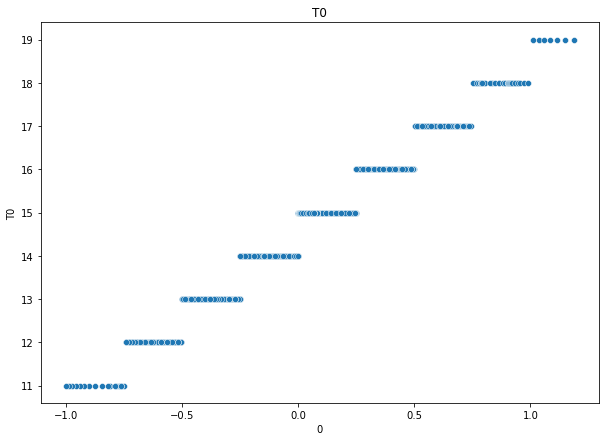

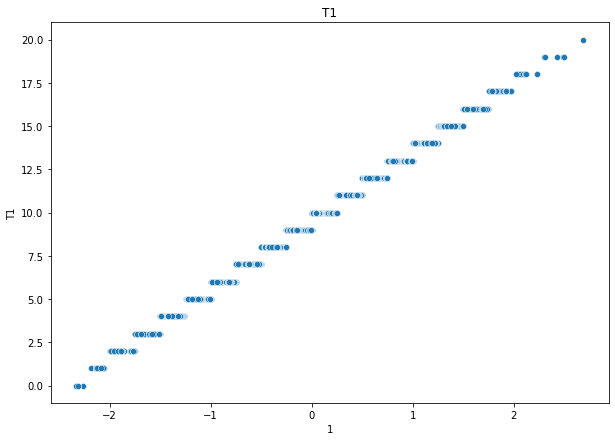

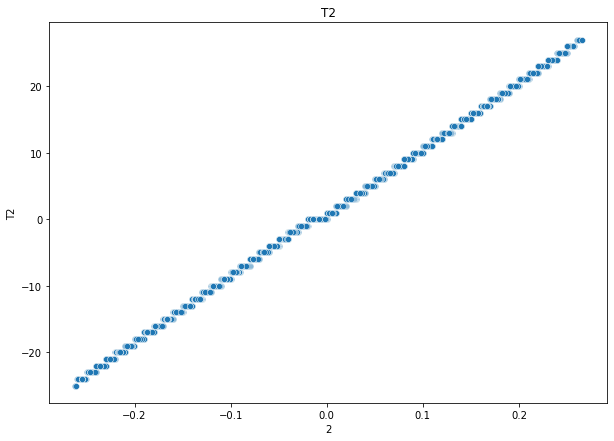

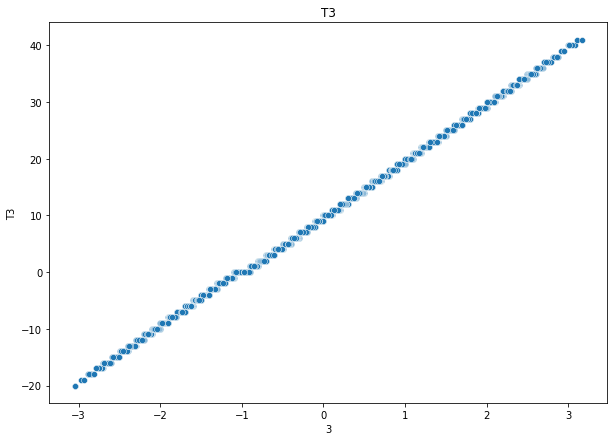

In [66]:
for x in range(4):
    plt.figure(figsize = (10,7))
    plt.title('T'+str(x))
    sns.scatterplot(data = df_compare, x = x, y = ('T'+str(x)))

## Explore v1

In [140]:

Observation = [30, 62, 102, 62]
np_array_win_size = np.array([0.1, 0.1, 0.01, 0.1])
addition = np.array([15,30,50,30])

In [141]:
sp_v1 = np.product(Observation)

In [71]:
space_v0 = ((state_space/np_array_win_size) + addition).astype(np.int64)
df_state_space_t = pd.DataFrame(space_v0, columns = ['T0','T1','T2','T3'])
df_compare = pd.concat([df_state_space,df_state_space_t], axis = 1)
df_compare

,0,1,2,3,T0,T1,T2,T3
0,0.013357,0.231385,-0.008815,-0.257498,15,32,49,27
1,0.017985,0.036390,-0.013965,0.032392,15,30,48,30
2,0.018713,-0.158529,-0.013317,0.320636,15,28,48,33
3,0.015542,-0.353459,-0.006904,0.609090,15,26,49,36
4,0.008473,-0.548484,0.005278,0.899590,15,24,50,38
...,...,...,...,...,...,...,...,...
55847,0.034745,0.442238,-0.131900,-0.979135,15,34,36,20
55848,0.043590,0.249107,-0.151483,-0.730621,15,32,34,22
55849,0.048572,0.445962,-0.166095,-1.066888,15,34,33,19
55850,0.057491,0.642845,-0.187433,-1.406756,15,36,31,15


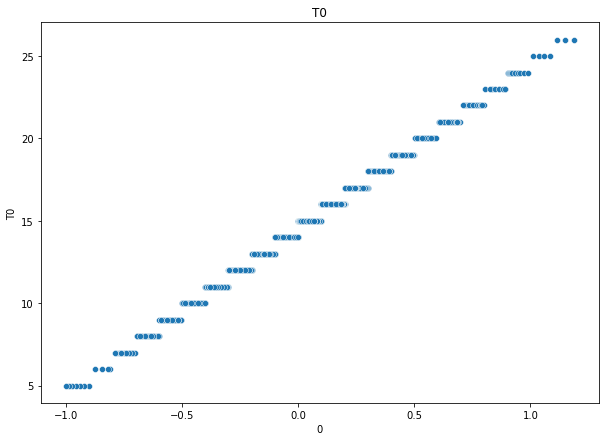

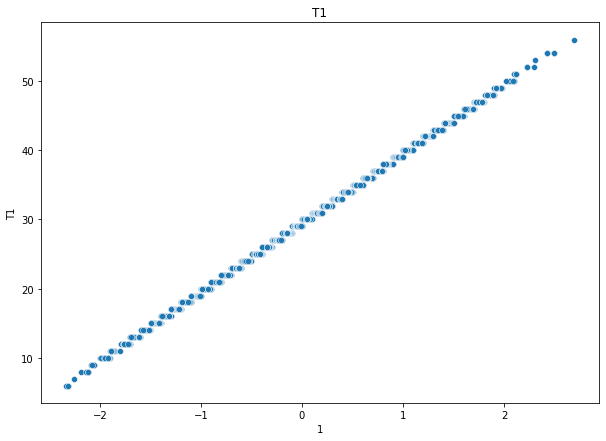

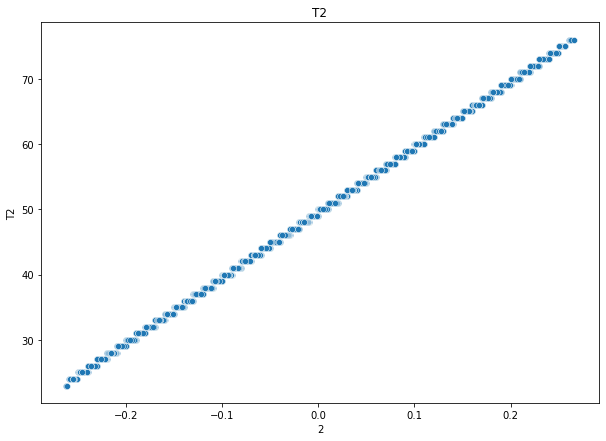

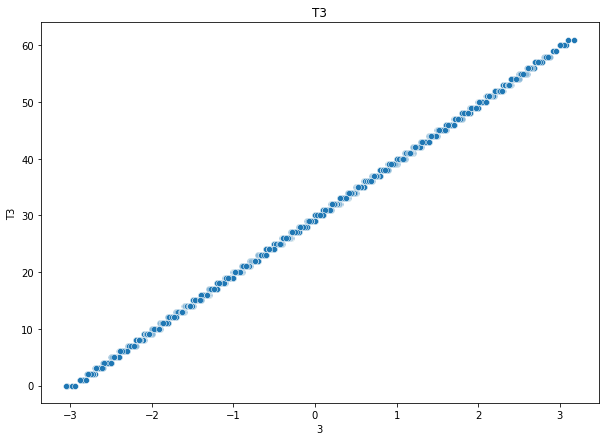

In [72]:
for x in range(4):
    plt.figure(figsize = (10,7))
    plt.title('T'+str(x))
    sns.scatterplot(data = df_compare, x = x, y = ('T'+str(x)))

## explore v2

In [142]:
## binning explore

# pd.qcut(df_state_space[0],q=10).value_counts()
# pd.cut(df_state_space[0],bins=35).value_counts()

# plt.figure(figsize = (9,6))
# sns.histplot(df_state_space[(df_state_space[1]>-0.4)&(df_state_space[1]<0.4)][1])

# plt.figure(figsize = (9,6))
# sns.histplot(df_state_space[(df_state_space[3]>-0.9)&(df_state_space[3]<0.9)][3])

In [162]:
Observation = [11, 29, 70, 25]
np_array_win_size = np.array([0.3, 0.2, 0.008, 0.3])
addition = np.array([6,14,35,13])

In [163]:
sp_v2 = np.product(Observation)

In [164]:
sp_v2

558250

In [160]:
sp_v0

2250000

In [161]:
space_v0 = ((state_space/np_array_win_size) + addition).astype(np.int64)
df_state_space_t = pd.DataFrame(space_v0, columns = ['T0','T1','T2','T3'])
df_compare = pd.concat([df_state_space,df_state_space_t], axis = 1)

df_compare.agg([np.max,np.min])

,0,1,2,3,T0,T1,T2,T3
amax,1.185539,2.687176,0.265593,3.169162,9,27,68,23
amin,-0.997824,-2.333086,-0.262256,-3.048532,2,2,2,2


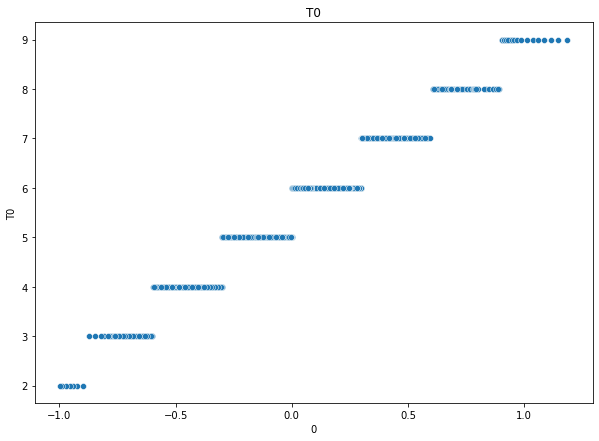

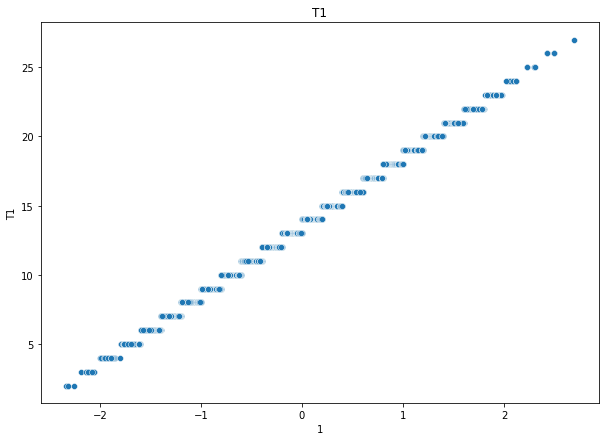

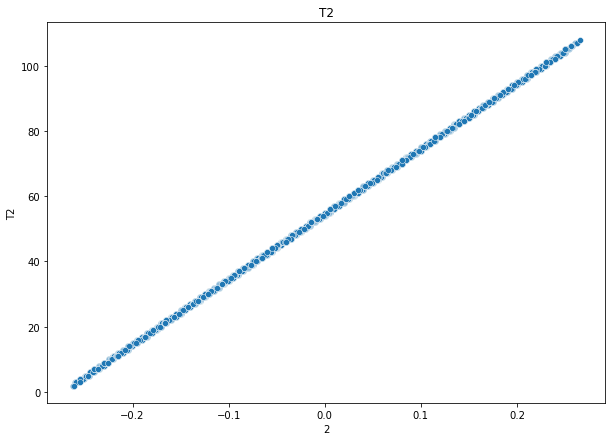

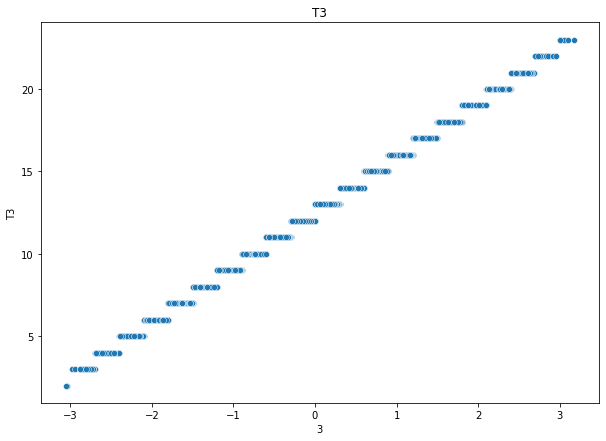

In [134]:
for x in range(4):
    plt.figure(figsize = (10,7))
    plt.title('T'+str(x))
    sns.scatterplot(data = df_compare, x = x, y = ('T'+str(x)))